<a href="https://colab.research.google.com/github/ttma333/python/blob/main/pt1_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이토치(PyThorch) 튜토리얼

https://tutorials.pytorch.kr/

# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공


## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능


In [ ]:
import torch
torch.__version__

'1.13.0+cu116'

## 텐서 초기화와 데이터 타입

### 초기화 되지 않은 텐서

In [ ]:
x = torch.empty(4,2)
print(x)

tensor([[4.3733e-34, 0.0000e+00],
        [3.5032e-44, 0.0000e+00],
        [       nan, 0.0000e+00],
        [1.1578e+27, 7.1463e+22]])


In [ ]:
import numpy as np
x = np.empty([4,2])
print(x)

[[6.68736587e-316 1.77863633e-322]
 [2.12199579e-314 2.23674517e-046]
 [1.10156789e-094 3.51757736e+180]
 [3.90842270e+160 3.43135775e-315]]


### 무작위로 초기화된 텐서


In [ ]:
x = torch.rand(4,2) # 0~1 사이의 숫자를 균등하게 생성
print(x)

tensor([[0.9648, 0.8150],
        [0.4553, 0.1485],
        [0.2433, 0.6767],
        [0.5771, 0.5016]])


데이터 타입(dtype)이 long이고 0으로 채워진 텐서


In [ ]:
x = torch.zeros(4,2, dtype=torch.long)
print(x)


tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [ ]:
x = torch.tensor([3,2,3])
print(x)

tensor([3, 2, 3])


2 x 4크기, double 타입 1로채워진 텐서

In [ ]:
x = x.new_ones(2,4,dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


x와 같은 크기,float 타입,무작위로 채워진 텐서


In [ ]:
x = torch.rand_like(x,dtype=torch.float)  # 사이즈를 튜플로 입력하지 않고 기존의 텐서를 정의
print(x)

tensor([[0.2031, 0.6736, 0.3010, 0.6323],
        [0.2934, 0.2413, 0.9717, 0.4860]])


In [ ]:
x = torch.randn(5) # 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성
print(x)

tensor([ 1.5608, -3.5864,  1.6544,  0.1601,  1.2307])


텐서의 크기 계산


In [ ]:
print(x.size())

torch.Size([5])


## 데이터 타입(Data Type)

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


In [ ]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [ ]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [ ]:
it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [ ]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


## CUDA Tensors
- .to 메소드를 사용하여 텐서를 어떠한장치(cpu,gpu)로도 옮길 수 있음
- NVIDIA가 만든 병렬 컴퓨팅 플랫폼 및 API 모델로, 보통 '쿠다'라고 발음한다. CUDA 플랫폼은 GPU 의 가상 명령어셋을 사용할 수 있도록 만들어주는 소프트웨어 레이어이며, NVIDIA가 만든 CUDA 코어가 장착된 GPU에서 작동


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-1.9044])
-1.9044173955917358
torch.float32


In [ ]:
# gpu 연결 끊었을때
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
# gpu 연결 했을때
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## 다차원 텐서 표현

### 0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 텐서(tensor)
- 축과 형상이 없음

In [ ]:
t0 = torch.tensor(2)

print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(2)


### 1D Tensor(vector)
- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재

In [ ]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


### 2D Tensor(Matrix)
- 행렬과 같은 모양으로 두개의 축이 존재
- 일반적인 수치,통계 데이터셋이 해당
- 주로 샘플(samples)과 특성(features)을 가진 구조로 사용 

In [ ]:
t2= torch.tensor([[1,2,3],[4,5,6]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


### 3D Tensor
- 큐브(cube)와 같은 모양으로 세개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간축기 포함된 시계역 데이터에 해당
- 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
- 주로 샘플(samples),타임스텝(timesteps),features 를 가진구조로 이용

## 텐서의 연산(Operations)
- 텐서에 대한 수학연산,삼각함수,비트연산,비교연산,집계 등제공

In [ ]:
# https://aigong,tistory,com/1178
import math

a = torch.randn(1,2)
print(a)
print(torch.abs(a)* 2 - 1) # 가우시안 표준정규 분포
print(torch.ceil(a))
print(torch.FloatTensor(a))
print(torch.clamp(a,-0.5,0.5))


tensor([[ 1.1306, -0.6750]])
tensor([[1.2611, 0.3499]])
tensor([[2., -0.]])
tensor([[ 1.1306, -0.6750]])
tensor([[ 0.5000, -0.5000]])


In [ ]:
# torch.clamp : 입력값이 min < x(input) < max이면 x가 그대로 나오지만
# min 보다 작으면 min 값이, max 보다 크면 max 값이 나오는 구조
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,1])))


tensor([[-0.7559, -0.8169]])
tensor(-0.8169)
tensor(-0.7559)
tensor(-0.7864)
tensor(0.0431)
tensor(0.6175)
tensor([1, 2, 3])


????
- argmax : 최대값을 가진 인덱스
- argmin : 최소값을 가진 인덱스


In [ ]:
x = torch.rand(2,2)
print(x,'\n')
print(x.max(dim=0),'\n')
print(x.max(dim=1))

tensor([[0.3239, 0.8927],
        [0.5777, 0.9100]]) 

torch.return_types.max(
values=tensor([0.5777, 0.9100]),
indices=tensor([1, 1])) 

torch.return_types.max(
values=tensor([0.8927, 0.9100]),
indices=tensor([1, 1]))


In [ ]:
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)

tensor([[0.7386, 0.0607],
        [0.0457, 0.9530]])
tensor([[0.9986, 0.3693],
        [0.9482, 0.9476]])


torch.add:덧셈

In [ ]:
print(x+y)
print(torch.add(x,y))

tensor([[1.7372, 0.4300],
        [0.9939, 1.9007]])
tensor([[1.7372, 0.4300],
        [0.9939, 1.9007]])


결과 텐서를 인자로 제공

In [ ]:
result = torch.empty(2,4)
torch.add(x,y,out=result)
print(result)

tensor([[1.7372, 0.4300],
        [0.9939, 1.9007]])


<ipython-input-20-fa27375dc8ba>:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:17.)
  torch.add(x,y,out=result)


in-place 방식
- in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 _가붙음
- x.copy_(y),x.t_()

In [ ]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[0.7386, 0.0607],
        [0.0457, 0.9530]])
tensor([[0.9986, 0.3693],
        [0.9482, 0.9476]])
tensor([[1.7372, 0.4300],
        [0.9939, 1.9007]])


torch.sub:뺄셈

In [ ]:
print(x)
print(y)
print(x-7,'\n')
x.sub_(y)
print(x)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[0.7386, 0.0607],
        [0.0457, 0.9530]])
tensor([[1.7372, 0.4300],
        [0.9939, 1.9007]])
tensor([[-6.2614, -6.9393],
        [-6.9543, -6.0470]]) 

tensor([[-0.9986, -0.3693],
        [-0.9482, -0.9476]])
tensor([[-2.7358, -0.7992],
        [-1.9421, -2.8483]])
tensor([[-2.7358, -0.7992],
        [-1.9421, -2.8483]])


torch.mul: 곱셈

In [ ]:
print(x)
print(y)
print(x*y)
x.mul_(y)
print(x)
print(y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[-0.9986, -0.3693],
        [-0.9482, -0.9476]])
tensor([[1.7372, 0.4300],
        [0.9939, 1.9007]])
tensor([[-1.7348, -0.1588],
        [-0.9424, -1.8012]])
tensor([[-1.7348, -0.1588],
        [-0.9424, -1.8012]])
tensor([[1.7372, 0.4300],
        [0.9939, 1.9007]])
tensor([[-3.0138, -0.0683],
        [-0.9367, -3.4234]])
tensor([[-3.0138, -0.0683],
        [-0.9367, -3.4234]])


torch.div:나눗셈

In [ ]:
print(x)
print(y)
print(x/y)
x.div_(y)
print(x)
print(y)
print(torch.div(x,y))
print(x.div(y))

tensor([[-1.7348, -0.1588],
        [-0.9424, -1.8012]])
tensor([[1.7372, 0.4300],
        [0.9939, 1.9007]])
tensor([[-0.9986, -0.3693],
        [-0.9482, -0.9476]])
tensor([[-0.9986, -0.3693],
        [-0.9482, -0.9476]])
tensor([[1.7372, 0.4300],
        [0.9939, 1.9007]])
tensor([[-0.5748, -0.8588],
        [-0.9540, -0.4986]])
tensor([[-0.5748, -0.8588],
        [-0.9540, -0.4986]])


torch.mm:내적(dot product)

In [ ]:
print(x)
print(y)

print(torch.matmul(x,y))
z = torch.mm(x,y)
print(z)
print(torch.svd(z)) # singular value decomposition A= U 시그마 VT

tensor([[-0.9986, -0.3693],
        [-0.9482, -0.9476]])
tensor([[1.7372, 0.4300],
        [0.9939, 1.9007]])
tensor([[-2.1018, -1.1312],
        [-2.5891, -2.2089]])
tensor([[-2.1018, -1.1312],
        [-2.5891, -2.2089]])
torch.return_types.svd(
U=tensor([[-0.5712, -0.8208],
        [-0.8208,  0.5712]]),
S=tensor([4.1362, 0.4144]),
V=tensor([[ 0.8041,  0.5946],
        [ 0.5946, -0.8041]]))


##텐서의 조작(Manupulations)

인덱싱(indexing):Numpy 처럼 인덱싱 형태로 사용가능

In [ ]:
import torch
x = torch.Tensor([[1,2],[3,4]])
print(x)

print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1])
print(x[:,0])
print(x[:,1])
print(x[0,:])
print(x[1,:])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


https://bigdatadiary0819.tistory.com/60

º 랜덤한 값을 가지는 텐서 생성

1. torch.rand() : 0과 1 사이의 숫자를 균등하게 생성

2. torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

3. torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

4. torch.randn_like() :  사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.randint() : 주어진 범위 내의 정수를 균등하게 생성, 자료형은 torch.float32

6. torch.randint_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

7. torch.randperm() : 주어진 범위 내의 정수를 랜덤하게 생성


º 특정한 값을 가지는 텐서 생성

1. torch.arange() : 주어진 범위 내의 정수를 순서대로 생성

2. torch.ones() : 주어진 사이즈의 1로 이루어진 텐서 생성

3. torch.zeros() : 주어진 사이즈의 0으로 이루어진 텐서 생성

4. torch.ones_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.zeros_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

6. torch.linspace() : 시작점과 끝점을 주어진 갯수만큼 균등하게 나눈 간격점을 행벡터로 출력
7. torch.logspace() : 시작점과 끝점을 주어진 갯수만큼 로그간격으로 나눈 간격점을 행벡터로 출력


view: 텐서의 크기(size)나 모양(shape)을 변경
- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [ ]:
import torch
x= torch.randn(4,5)
print(x)
print(x.shape)
print(x.size())

tensor([[ 0.1674,  0.9354, -0.6482, -0.6984, -0.2293],
        [-0.3815,  0.6416, -1.3891, -0.0877,  0.4265],
        [ 0.9279,  0.4010, -1.1499, -1.3837, -0.3819],
        [ 2.2478,  1.0086, -1.3202, -0.7987, -1.7951]])
torch.Size([4, 5])
torch.Size([4, 5])


In [ ]:
x = torch.FloatTensor([
    [1,2],
    [3,4],
    [5,6],
    [7,8]
])

#size를 활용한 텐서사이즈 보기
print(x.size())
#shape를 활용한 텐서사이즈 보기
print(x.shape)
#dim을 활용한 텐서사이즈 보기
print(x.dim())
#0차원 사이즈 확인
print(x.size(0))
#1차원 사이즈 확인
print(x.shape[0])

torch.Size([4, 2])
torch.Size([4, 2])
2
4
4


In [ ]:
x = torch.randn(4,5)
print(x)
print()
y = x.view(20)
print(y)
z = x.view(5,-1)
print()
print(z)

tensor([[ 1.4698,  0.3338, -0.1622, -2.1548, -0.8369],
        [ 0.2351,  0.0415,  1.4121, -1.6841, -0.3629],
        [-0.1062,  1.0826, -2.2371, -0.6499, -1.4762],
        [ 1.2188,  1.2010, -0.0166, -0.0720,  0.3997]])

tensor([ 1.4698,  0.3338, -0.1622, -2.1548, -0.8369,  0.2351,  0.0415,  1.4121,
        -1.6841, -0.3629, -0.1062,  1.0826, -2.2371, -0.6499, -1.4762,  1.2188,
         1.2010, -0.0166, -0.0720,  0.3997])

tensor([[ 1.4698,  0.3338, -0.1622, -2.1548],
        [-0.8369,  0.2351,  0.0415,  1.4121],
        [-1.6841, -0.3629, -0.1062,  1.0826],
        [-2.2371, -0.6499, -1.4762,  1.2188],
        [ 1.2010, -0.0166, -0.0720,  0.3997]])


item: 텐서에 값이 단하나라도 존재하면 숫자값을 얻을 수 있음

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.2262])
-0.22615854442119598
torch.float32


squeeze: 차원을 축소(제거)


In [ ]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.5375, 0.8411, 0.2225],
         [0.8385, 0.5607, 0.6371],
         [0.2522, 0.8576, 0.6970]]])
torch.Size([1, 3, 3])


unsqueeze : 차원을 증가(생성)

In [ ]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.4129, 0.5453, 0.1062],
        [0.5986, 0.4486, 0.4866],
        [0.7872, 0.4304, 0.9477]])
torch.Size([3, 3])


In [ ]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.4129, 0.5453, 0.1062],
         [0.5986, 0.4486, 0.4866],
         [0.7872, 0.4304, 0.9477]]])
torch.Size([1, 3, 3])


In [ ]:
tensor = tensor.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[[0.4129, 0.5453, 0.1062]],

         [[0.5986, 0.4486, 0.4866]],

         [[0.7872, 0.4304, 0.9477]]]])
torch.Size([1, 3, 1, 3])


stack : 텐서가 결합

In [ ]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)
print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


###cat:텐서를 결합하는 메소드(concatenate)
- 넘파이의 stack과 유사하지만,쌓을 dim이 존재해야함
- 해당 차원을늘려준후 결합

In [ ]:
a= torch.randn(1,3,3)
print(a)
b=torch.randn(1,3,3)
print(b)
c=torch.cat((a,b),dim=0)
print(c)
print(c.size())

tensor([[[-0.0153, -1.6214,  0.5192],
         [ 0.6709, -0.9393, -0.4084],
         [ 0.9390, -1.0101,  0.3590]]])
tensor([[[ 0.0253, -0.0498, -1.4728],
         [ 1.6753, -1.2639, -1.5909],
         [-0.2705,  2.2813, -0.5680]]])
tensor([[[-0.0153, -1.6214,  0.5192],
         [ 0.6709, -0.9393, -0.4084],
         [ 0.9390, -1.0101,  0.3590]],

        [[ 0.0253, -0.0498, -1.4728],
         [ 1.6753, -1.2639, -1.5909],
         [-0.2705,  2.2813, -0.5680]]])
torch.Size([2, 3, 3])


In [ ]:
c = torch.cat((a,b),dim=1)
print(c)
print(c.size())

tensor([[[-0.0153, -1.6214,  0.5192],
         [ 0.6709, -0.9393, -0.4084],
         [ 0.9390, -1.0101,  0.3590],
         [ 0.0253, -0.0498, -1.4728],
         [ 1.6753, -1.2639, -1.5909],
         [-0.2705,  2.2813, -0.5680]]])
torch.Size([1, 6, 3])


chunk: 텐서를 여러개로 나눌때 사용(몇개로 나눌 것인가?)

In [ ]:
import torch

tensor = torch.rand(3,6)

t1,t2,t3 = torch.split(tensor,2,dim=1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.4514, 0.9545, 0.5629, 0.2956, 0.7667, 0.5393],
        [0.0627, 0.8365, 0.2810, 0.7399, 0.0014, 0.6231],
        [0.1753, 0.2947, 0.3544, 0.5427, 0.0278, 0.6185]])
tensor([[0.4514, 0.9545],
        [0.0627, 0.8365],
        [0.1753, 0.2947]])
tensor([[0.5629, 0.2956],
        [0.2810, 0.7399],
        [0.3544, 0.5427]])
tensor([[0.7667, 0.5393],
        [0.0014, 0.6231],
        [0.0278, 0.6185]])


torch <-> numpy
 - torch tensor(텐서)를 numpy array(배열)로 변환가능
  - numpy()
  - from_numpy()

- 텐서가 CPU 상에 있다면 Numpy 배열은 메모르 공간을 공유하므로 하나가 변하면 다른하나도 변함

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
print(a.to('cpu',torch.double))
print(type(a))

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
<class 'torch.Tensor'>


In [ ]:
b = a.numpy()
print(b)
print(type(b))

[1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [ ]:
a.add_(1)
print(a)
print(type(a))
print(b)
print(type(b))

tensor([3., 3., 3., 3., 3., 3., 3.])
<class 'torch.Tensor'>
[3. 3. 3. 3. 3. 3. 3.]
<class 'numpy.ndarray'>


In [ ]:
import numpy as np

a= np.ones(7)
b= torch.from_numpy(a)
np.add(a,1,out=a) # a에 1을 더해서 a를 출력
print(a)
print(b) #cpu에서 메모리 공유

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
b = b.numpy()
np.add(b,2,out=b)

array([4., 4., 4., 4., 4., 4., 4.])

Autograd(자동미분)
 - torch.autograd 패키지는 Tensor의 모든 연산에 대해 자동미분 제공
 - 이는 코드를 어떨게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
 - backprop을 위해 미분값을 자동으로 계산



 Torch.autograd를 사용한 자동미분

https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html


requires_grad 속성을 True로 설정하면 해당텐서에게 이루어지는 모든 연산들을 추적하기 시작 
기록을 추적하는것을 중단하게 하려면 .detach()를 호출하여 연산기록으로 부터 분리

In [ ]:
a = torch.randn(3,3)
# .requires_grad=True)
a = a*3
print(a)
print(a.requires_grad)

tensor([[-1.5348, -6.0334, -6.8941],
        [-0.6225,  4.5110,  3.5176],
        [ 1.3385,  0.9459,  3.7054]])
False


requires_grad_(...)는 기존텐서의 requires_grad 값을 바꿔치기(in-place)하여 번경

grad_fn:미분값을 계산한 함수에 대한 정보저장(어떤 함수에 대해서 backprop 했는지)

In [ ]:
a.requires_grad_(True) # _를 사용하면 inplace 연산 바꾼값으로 계산
print(a.requires_grad_)
b = (a*a).sum()
print(b)
print(b.grad_fn)

<built-in method requires_grad_ of Tensor object at 0x7f88b5273ef0>
tensor(135.8125, grad_fn=<SumBackward0>)


### 기울기(gradient)

In [ ]:
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
z = y*y
out=z.mean()
print(z,out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산이 완료된 후 .backward()를 호출하면 자동으로 역전파 계산이 가능하고 .grad 속성에 누적됨

In [ ]:
print(out)
out.backward() #backward를 통해서 역전파 계산이 가능

tensor(36., grad_fn=<MeanBackward0>)


grad:data가 가져온 layer에 대한 미분값 저장

In [ ]:
print(x)
print(x.grad) # 미분값

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [ ]:
x = torch.randn(3,requires_grad=True)
y = x*2
while y.data.norm() < 1000:
  y = y*2
print(y)

tensor([ 1064.3658,  -200.4549, -1454.4127], grad_fn=<MulBackward0>)


In [ ]:
# v 기준으로 backward 계산
v = torch.tensor([0.1,1.0,0.0001],dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


with torch.no_grad() 를 사용하여 기울기의 업데이트를 하지않음 기록을 추적하는 것을 방지하기 위해 코드블럭을 with torch.no_grad()로 감싸면 기울기 계산은 필요없지만, requires_grad=True로 설정되어 학습가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [ ]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


detach():내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [ ]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x)
print(y)
#print(x.eq(y).all())

True
False
tensor([ 1.0394, -0.1958, -1.4203], requires_grad=True)
tensor([ 1.0394, -0.1958, -1.4203])


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print(a.data)
print(a.grad) # 계산한 것이 아무것도 없음
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


b = a + 2

In [ ]:
b = a+2

In [ ]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


<ipython-input-52-7222c1aec66c>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(b.grad)


c = b^2

In [ ]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


<ipython-input-55-f6ca42a4f63f>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(c.grad)


In [ ]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


<ipython-input-56-85e75c577388>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(out.grad)


In [ ]:
w = torch.tensor(3.0, requires_grad = True)

In [ ]:
y = w**3 + 10

In [ ]:
y.backward()

In [ ]:
print(f'y를 w로 미분한 값 : {w.grad}')

y를 w로 미분한 값 : 27.0


###FashionMNIST 분류 모델

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
import torchvision
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))]) #평균, 표준편차

In [ ]:
trainset = datasets.FashionMNIST(root='/content/',
                                 train=True,download=True,
                                 transform = transform)

testset = datasets.FashionMNIST(root='/content/',
                                 train=False,download=True,
                                 transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [ ]:
!ls

drive  FashionMNIST  sample_data


In [ ]:
train_loader = DataLoader(trainset,batch_size=128,shuffle=True,num_workers=2) # 디폴트 값은 0인데 데이터로딩을 위해 몇개의 서브 프로세스를 사용할 것인지를 결정
test_loader = DataLoader(testset,batch_size=128,shuffle=False,num_workers=2)

In [ ]:
# iter는 번복가능한 객체에서 이터레이터를 반환하고,next는 이터레이터에서 값을 차례대로 꺼냄
images,labels = next(iter(train_loader)) # 데이터를 접근하려면 python의 내장함수 iter의 next를 사용하여 접근
images.shape , labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

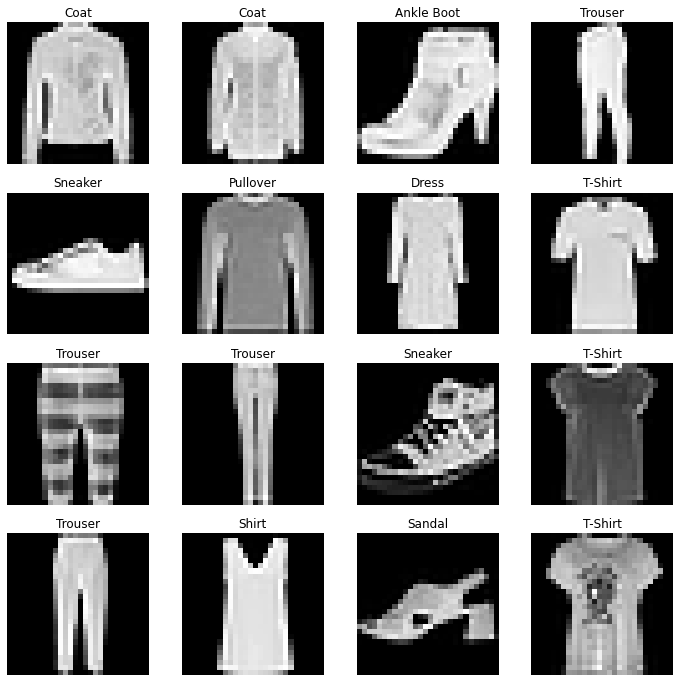

In [ ]:
import matplotlib.pyplot as plt
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot',

}

figure = plt.figure(figsize=(12,12))
cols, rows = 4,4
for i in range(1,cols*rows +1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image,cmap='gray')

plt.show()

### 모델정의 파라미터
https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1

dilation은 kernel의 한픽셀 에서 다른 픽셀까지의 거리를 나타냅니다

nn Linear
 - 선형 계층은 저장된 가중치와 편향을 사용하여 입력에 선형 변환을 적용하는 모듈

nn.Relu
- 비선형 활성화(activation)는 모델의 입력과 출력 사이에 복잡한 관계(mapping)를 만듭니다. 비선형 활성화는 선형 변환 후에 적용되어 비선형성(nonlinearity) 을 도입하고, 신경망이 다양한 현상을 학습할 수 있도록 돕습니다.

In [ ]:
from torch import nn
from torch.nn import functional as f
class net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv2d_32 = nn.Conv2d(1,32,3,padding =1)
    self.conv2d_64 = nn.Conv2d(32,64,3,padding=1)
    self.max2d = nn.MaxPool2d(2,2)
    self.conv2d_128 = nn.Conv2d(64,128,3,padding=1)
    self.conv2d_256 = nn.Conv2d(128,256,3,stride=2,padding=1)
    self.linear1 = nn.Linear(3*3*256,256)
    self.linear2 = nn.Linear(256,64)
    self.linear3 = nn.Linear(64,10)
    self.batch2d1 = nn.BatchNorm2d(64)
    self.batch2d2 = nn.BatchNorm2d(256)
    self.batchid = nn.BatchNorm1d(64)
    self.drop = nn.Dropout(p=0.3)
    self.flat = nn.Flatten()

  def forward(self,x):
    x = x.view(-1,1,28,28)
    x = f.relu(self.conv2d_32(x))
    x = f.relu(self.conv2d_64(x))
    x = self.batch2d1(x)
    x = f.relu(self.max2d(x))
    x = self.drop(x)

    x = f.relu(self.conv2d_128(x))
    x = f.relu(self.conv2d_256(x))
    x = self.batch2d2(x)
    x = f.relu(self.max2d(x))
    x = self.drop(x)

    x = self.flat(x)
    x = f.relu(self.linear1(x))
    x = self.drop(x)
    x = f.relu(self.linear2(x))
    x = self.drop(x)
    x = self.batchid(x)
    x = f.log_softmax(self.linear3(x),dim=1)
    
    return(x)

net = net()
print(net)

net(
  (conv2d_32): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_64): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_128): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_256): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (linear1): Linear(in_features=2304, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (batch2d1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2d2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchid): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
)


In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

20
torch.Size([32, 1, 3, 3])


### 손실함수와 옵티마이저

https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html


In [ ]:
import torch
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(net.parameters(),lr=0.008)

### 모델 학습

배치수 확인

In [ ]:
total_batch = len(train_loader)
print(total_batch)

469


zero_grad()
보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데, 한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장이 된다.

이후 다음 루프에서 zero_grad()를 하지않고 역전파를 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안된다고 한다.

따라서 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 한다.


In [ ]:
for epoch in range(10):
  running_loss = 0.0 # 초기화
  for i,data in enumerate(train_loader,0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step() # weight를 업데이트하는 시점은 optimaizer.step()이 실행되는 시점

    running_loss += loss.item()
    if i % 100 == 99:
      print(f'epoch:{epoch+1},iter:{i+1},loss{running_loss/2000}')
      running_loss = 0.0

epoch:1,iter:100,loss0.013091759569942952
epoch:1,iter:200,loss0.013491113618016243
epoch:1,iter:300,loss0.013090509869158268
epoch:1,iter:400,loss0.013768885023891926
epoch:2,iter:100,loss0.012446549206972123
epoch:2,iter:200,loss0.012524493917822838
epoch:2,iter:300,loss0.012639165870845319
epoch:2,iter:400,loss0.012868289448320866
epoch:3,iter:100,loss0.011877148017287254
epoch:3,iter:200,loss0.01226598560065031
epoch:3,iter:300,loss0.01253879950195551
epoch:3,iter:400,loss0.011628140907734633
epoch:4,iter:100,loss0.011403570659458637
epoch:4,iter:200,loss0.011321714498102665
epoch:4,iter:300,loss0.011437016814947128
epoch:4,iter:400,loss0.01166307781636715


KeyboardInterrupt: ignored

In [ ]:
path = '.fashion_mnist.pth'
torch.save(net.state_dict(),PATH)

In [ ]:
import inmpy as np
def = imshow(image):
  image = image/2+0.5
  npimg = image.numpy()

  fig = plt.figure(figsize(16,8))
  plt.imshow(np.transpose(npimg,(1,2,0))) #rgb = gbr
  plt.show()

In [ ]:
import torchvision

images,labels = next(iter(test_loader))

imshow(torchvision.utils.make_grid(images[:6]))

In [ ]:
outputs = net(images)
print(outputs)
_,predicted = torch.max(outputs,1)
print(predicted)

In [ ]:
core,
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images , labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs,data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print(100*correct/total)

keras

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images , train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [ ]:
# 데이터 전처리
train_images,test_images = train_images / 255.0, test_images/255.0

optimizer 설명

https://peterleeeeee.github.io/categorical_cross_entropy/


In [ ]:
from tensorflow.python import metrics
from torch.nn.modules import activation
# 모델구성,컴파일
def model():
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=(28,28,1)),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(256,3,activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(512,3,activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dense(10)
  ])

 # Sparse Categorical Cross Entropy는 반대로 label이 정수일 때 사용한다. 기본적으로 데이터 셋이 제공될 때 label이 정수 형태를 띄고 있는 경우가 많은데 이럴 때 이 loss function을 사용한다.
 
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer='adam',
                metrics=['accuracy'])
  
  return model

In [ ]:
model = model()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 256)       73984     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 512)         1180160   
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 512)       

In [ ]:
#모델 훈련
model.fit(train_images,train_labels,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 17s 5ms/step - loss: 2.3028 - accuracy: 0.0977
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0971
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3027 - accuracy: 0.0995
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0977
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0988
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0989
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.0997
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 10/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.30

In [ ]:
# 정확도 평가하기
loss,accuracy = model.evaluate(test_images)
print(loss,accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
0.0 0.0


In [ ]:
# 예측
import numpy as np
pred = model.predict(test_images)
print(pred[0])
print(np.argmax(pred[0]))

313/313 [==============================] - 1s 2ms/step
[-0.00122566  0.00202272 -0.02048628 -0.00413165 -0.0072023  -0.00948245
  0.0030553  -0.00311907 -0.01310861 -0.00331419]
6
